In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

config = dict()
config['resource_dir'] = '../resources/UCI_HAR_Dataset/'
config['features'] = config['resource_dir'] + "features.txt"
config['train_x_train'] = config['resource_dir'] + "train/X_train.txt"
config['train_y_train'] = config['resource_dir'] + "train/Y_train.txt"
config['test_x_test'] = config['resource_dir'] + "test/X_test.txt"
config['test_y_test'] = config['resource_dir'] + "test/Y_test.txt"
config['activity_labels'] = config['resource_dir'] + "activity_labels.txt"

activity_labels_df = pd.read_csv(config['activity_labels'], sep=r"\s+", header=None).set_index(0)

# Initialising train Y data set
train_y_df = pd.read_csv(config['train_y_train'], header=None)
train_y_df.columns=['activity_idx']
train_y_df['activity_labels'] = train_y_df['activity_idx'].map(lambda x: activity_labels_df.loc[x].values[0])

# Initialising test Y data set
test_y_df = pd.read_csv(config['test_y_test'], header=None)
test_y_df.columns=['activity_idx']
test_y_df['activity_labels'] = test_y_df['activity_idx'].map(lambda x: activity_labels_df.loc[x].values[0])


# Initialising headers
col_headers_list = [line.split(" ")[1].strip() for line in open(config['features'])]
col_headers_set = set(line.split(" ")[1].strip() for line in open(config['features']))

# Initialising train X data set
train_x_df = pd.read_csv(config['train_x_train'], sep=r"\s+",header=None)
train_x_df.columns = col_headers_list

train_x_df = pd.concat([train_x_df,train_y_df], axis=1)

train_x_df = train_x_df.T.reset_index().drop_duplicates(subset='index',take_last=True).set_index('index').T
train_x_df.rename(columns=lambda x: x.replace("BodyBody",""), inplace=True)
train_x_df.rename(columns=lambda x: x.replace("Body",""), inplace=True)

# Initialising test X data set

test_x_df = pd.read_csv(config['test_x_test'], sep=r"\s+", header=None)
test_x_df.columns = col_headers_list

test_x_df = pd.concat([test_x_df,test_y_df], axis=1)

test_x_df = test_x_df.T.reset_index().drop_duplicates(subset='index',take_last=True).set_index('index').T
test_x_df.rename(columns=lambda x: x.replace("BodyBody",""), inplace=True)
test_x_df.rename(columns=lambda x: x.replace("Body",""), inplace=True)
#test_x_df.rename(columns=lambda x: x.replace("Mag",""), inplace=True)
#test_x_df.columns.values.tolist()

train_x_df



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


index,tAcc-mean()-X,tAcc-mean()-Y,tAcc-mean()-Z,tAcc-std()-X,tAcc-std()-Y,tAcc-std()-Z,tAcc-mad()-X,tAcc-mad()-Y,tAcc-mad()-Z,tAcc-max()-X,...,fGyroJerkMag-kurtosis(),"angle(tAccMean,gravity)","angle(tAccJerkMean),gravityMean)","angle(tGyroMean,gravityMean)","angle(tGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity_idx,activity_labels
0,0.288585,-0.0202942,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.0304004,-0.464761,-0.0184459,-0.841247,0.179941,-0.0586269,5,STANDING
1,0.278419,-0.0164106,-0.12352,-0.998245,-0.9753,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.00743457,-0.732626,0.703511,-0.844788,0.180289,-0.0543167,5,STANDING
2,0.279653,-0.0194672,-0.113462,-0.99538,-0.967187,-0.978944,-0.99652,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.0491178,5,STANDING
3,0.279174,-0.0262006,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.98275,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.0128925,0.640011,-0.485366,-0.848649,0.181935,-0.0476632,5,STANDING
4,0.276629,-0.0165697,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.12332,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.0438923,5,STANDING
5,0.277199,-0.0100979,-0.105137,-0.997335,-0.990487,-0.99542,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.0826322,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.0421264,5,STANDING
6,0.279454,-0.0196408,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.56443,-0.212754,-0.230622,0.0146367,-0.189512,-0.85215,0.18217,-0.04301,5,STANDING
7,0.277432,-0.0304883,-0.12536,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.0419758,5,STANDING
8,0.277293,-0.0217507,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.0809364,-0.234313,0.117797,-0.847971,0.188982,-0.0373639,5,STANDING
9,0.280586,-0.0099603,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.0205896,-0.12773,-0.482871,-0.0706701,-0.848294,0.19031,-0.0344173,5,STANDING


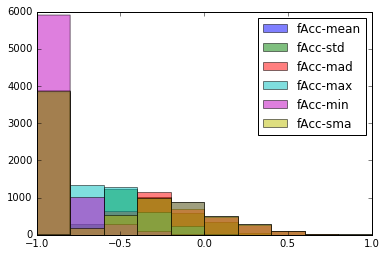

"\n'fAccMag-mean()',\n 'fAccMag-std()',\n 'fAccMag-mad()',\n 'fAccMag-max()',\n 'fAccMag-min()',\n 'fAccMag-sma()',\n"

In [2]:
plt.hist(train_x_df['fAccMag-mean()'],alpha=0.5,label='fAcc-mean')
plt.hist(train_x_df['fAccMag-std()'],alpha=0.5,label='fAcc-std')
plt.hist(train_x_df['fAccMag-mad()'],alpha=0.5,label='fAcc-mad')
plt.hist(train_x_df['fAccMag-max()'],alpha=0.5,label='fAcc-max')
plt.hist(train_x_df['fAccMag-min()'],alpha=0.5,label='fAcc-min')
plt.hist(train_x_df['fAccMag-sma()'],alpha=0.5,label='fAcc-sma')
plt.legend()
plt.show()

"""
'fAccMag-mean()',
 'fAccMag-std()',
 'fAccMag-mad()',
 'fAccMag-max()',
 'fAccMag-min()',
 'fAccMag-sma()',
"""

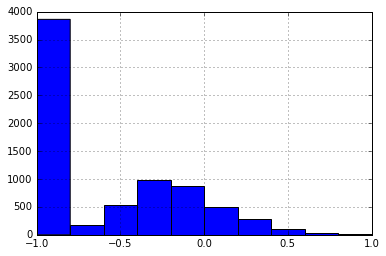

In [3]:
train_x_df['fAccMag-mean()'].hist()

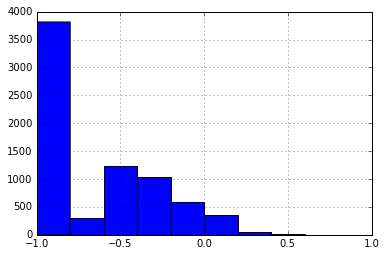

In [4]:
train_x_df['fAccMag-std()'].hist()

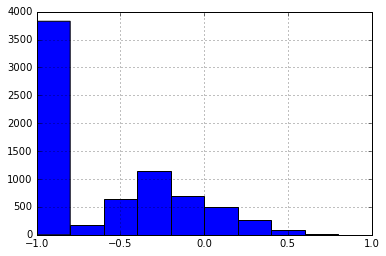

In [5]:
train_x_df['fAccMag-mad()'].hist()

In [6]:
n_estimators = 10

forest = RandomForestClassifier(n_estimators=n_estimators)

forest = forest.fit(train_x_df[train_x_df.columns[0:-2]],train_x_df['activity_labels'])



                


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


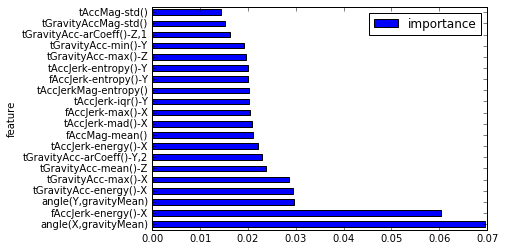

In [7]:
forest.estimators_
importances = forest.feature_importances_

plot_df = pd.DataFrame(train_x_df.columns[0:-2].values,columns=['feature'])
plot_df['importance'] = forest.feature_importances_

plot_df.sort_index(by='importance', ascending=False, inplace=True)

plot_df.head(20).set_index('feature').plot(kind='barh')




In [8]:
rslt = forest.predict(test_x_df[test_x_df.columns[0:-2]].values)
rslt

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING'], dtype=object)

In [9]:
forest.score(test_x_df[test_x_df.columns[0:-2]].values,test_x_df['activity_labels'])

0.90939938920936547

In [10]:
print forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2007179626, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1777972205, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1336845589, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
